# QBS 108 Machine Learning Assignment 3


### 1. t-SNE for Data Visualization

#### (a):
reference: http://theprofessionalspoint.blogspot.com/2019/03/advantages-and-disadvantages-of-t-sne.html

t-SNE is a dimensionality reduction machine learning method, or so called an embedding method. The embedding method can map high dimensional data points to low dimensional space. Specifically, t-SNE is a non-linear mapping method.

In terms of its advantages, it can be used to visualize high-dimensional datasets; it can preserve local structure that points which are close to one another in the high-dimensional data set will tend to be close to one another in the chart; it can handle non-linear data compared to PCA.

#### (b):

In [287]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
cancer = pd.read_csv('cancer_gene-expression_data_for_tsne.csv', index_col=0)
cancer.head()

,Cancer,gene_13968,gene_18617,gene_20131,gene_12738,gene_5337,gene_20496,gene_3408,gene_15234,gene_2833,...,gene_4911,gene_4915,gene_521,gene_8588,gene_7758,gene_7221,gene_8787,gene_12582,gene_19923,gene_7505
Patient,,,,,,,,,,,,,,,,,,,,,
sample_100,BRCA,8.591709,0.0,7.092408,9.142789,5.805636,7.033654,9.370833,5.209453,2.662957,...,8.238725,9.715028,8.106783,0.341075,9.342075,8.044028,0.0,0.0,0.000000,0.616640
sample_102,BRCA,8.801388,0.0,5.891225,8.094901,3.039454,5.237969,9.180374,4.675483,3.039454,...,5.235980,8.728067,7.949056,0.366140,9.433381,5.422445,0.0,0.0,2.632198,9.340010
sample_111,BRCA,8.612400,0.0,6.125393,7.892027,4.830783,5.890634,9.768285,5.335144,4.912295,...,6.274644,9.391233,7.007846,0.000000,9.637172,6.409890,0.0,0.0,0.412294,9.418873
sample_114,BRCA,8.293775,0.0,5.747242,8.353469,3.768322,5.979115,9.321678,6.105724,2.519743,...,8.646094,9.354020,7.111772,0.000000,9.209232,8.052677,0.0,0.0,0.000000,8.573837
sample_118,BRCA,8.776821,0.0,7.026391,7.372264,3.824371,5.639357,9.588062,5.239612,4.041331,...,10.725682,9.139298,8.196587,0.000000,9.473982,4.245861,0.0,0.0,0.273814,9.252138


In [288]:
y_subset = cancer.iloc[:,0]
x_subset = cancer.iloc[:,1:]


In [289]:
sorted(y_subset.unique())

['BRCA', 'COAD', 'KIRC', 'LUAD', 'PRAD']

In [290]:
# Import LabelEncoder
from sklearn import preprocessing
#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting y (string labels) into numbers.
y=le.fit_transform(y_subset)
# BRCA = 0, COAD = 1, KIRC = 2, LUAD = 3, PRAD = 4

In [291]:
# reference: https://www.datacamp.com/community/tutorials/introduction-t-sne
from sklearn.manifold import TSNE
np.random.seed(10)
tsne = TSNE(n_components=2)
tsne_results = tsne.fit_transform(x_subset)

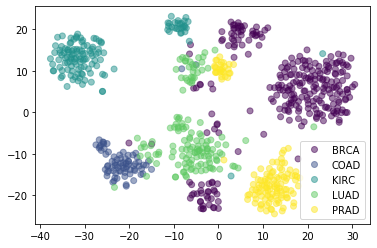

In [292]:
classes = ['BRCA', 'COAD', 'KIRC', 'LUAD', 'PRAD']
scatter = plt.scatter(tsne_results[:,0],tsne_results[:,1],  c = y, alpha=0.5)
plt.legend(handles=scatter.legend_elements()[0], labels=classes)

From the scatter plot, we can clearly see how the data are spaced apart and grouped together. We notice that all four cancer types except COAD have more than one cluster. For example, BRCA (purple) have a major cluster on the top right, and two smaller parts. Similarly, PRAD (yellow) have one major cluster at the bottom right and a smaller cluster a little towards its top right direction. By using the model above, we cannot clearly separate each cancer type apart.

#### (c):

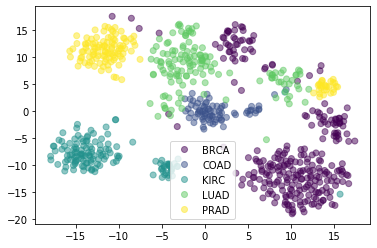

In [294]:
np.random.seed(10)
tsne1 = TSNE(n_components=2, perplexity=50, learning_rate= 100, n_iter=1500)
tsne_results1 = tsne1.fit_transform(x_subset)

scatter1 = plt.scatter(tsne_results1[:,0],tsne_results1[:,1],  c = y, alpha=0.5)
plt.legend(handles=scatter1.legend_elements()[0], labels=classes)

By tuning perplexity, learning rate, and number of iterations, we can slightly make the model better by reducing the data being mixed up with different cancer types.But still, the 5 cancer types are not well separated - we expect to have only one cluster for each type.

#### (d) limitations of t-SNE:
reference: https://mlexplained.com/2018/09/14/paper-dissected-visualizing-data-using-t-sne-explained/
1. Unlike methods like PCA,  t-SNE is non-convex, meaning it has multiple local minima and is therefore much more difficult to optimize. Everytime when the code is run, I got different result and plot.

2. It still assumes that the local structure of the manifold is linear. This may seem like a relatively benign assumption, but in complex manifolds where even the local structure is complex, this poses a significant problem.


### 2. Feed-forward Neural Network for Binary Classification:

In [3]:
labeled = pd.read_csv('hw3_labeled_data.csv', index_col=0)
unlabeled = pd.read_csv('hw3_unlabeled_data.csv', index_col=0)

In [4]:
labeled.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
patient_0,70,70,1.010,1,0,1,0,1,1,171,...,33,19100,3.6,0,1,0,0,0,0,1
patient_1,52,100,1.015,3,0,1,0,1,0,138,...,33,9600,4.0,1,1,0,1,0,1,1
patient_2,71,70,1.020,0,0,1,1,0,0,81,...,44,9800,6.0,0,0,0,1,0,0,0
patient_3,57,80,1.015,0,0,0,1,0,0,123,...,22,4300,3.0,1,1,0,1,0,1,1
patient_4,76,70,1.015,1,0,1,1,0,0,92,...,32,9600,4.1,1,0,0,1,0,0,1


#### (a) Exploratory data analysis:

Text(0, 0.5, 'Density')

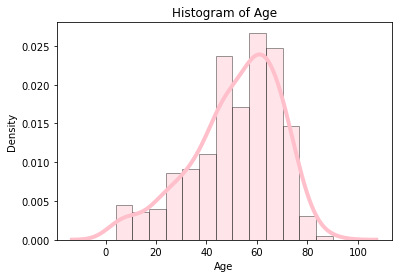

In [5]:
# density and histogram
import seaborn as sns
sns.distplot(labeled['age'], hist=True, kde=True, color = 'pink', hist_kws={'edgecolor':'black'},kde_kws={'linewidth': 4})
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Density')

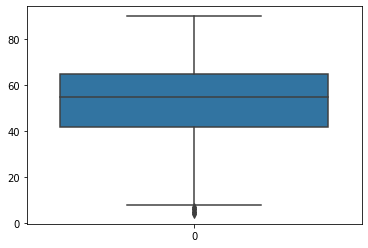

In [6]:
# boxplot
boxp = sns.boxplot(data=labeled['age'])

In [7]:
# Summary tables
np.round(labeled.describe(), 2).T

,count,mean,std,min,25%,50%,75%,max
age,300.0,51.74,17.43,4.0,42.00,55.00,65.00,90.00
bp,300.0,76.17,13.38,50.0,70.00,80.00,80.00,180.00
sg,300.0,1.02,0.01,1.0,1.01,1.02,1.02,1.02
al,300.0,0.99,1.33,0.0,0.00,0.00,2.00,5.00
su,300.0,0.51,1.16,0.0,0.00,0.00,0.00,5.00
rbc,300.0,0.72,0.45,0.0,0.00,1.00,1.00,1.00
pc,300.0,0.78,0.42,0.0,1.00,1.00,1.00,1.00
pcc,300.0,0.10,0.30,0.0,0.00,0.00,0.00,1.00
ba,300.0,0.05,0.22,0.0,0.00,0.00,0.00,1.00
bgr,300.0,150.47,80.58,22.0,100.00,122.00,171.00,490.00


(10, 0)

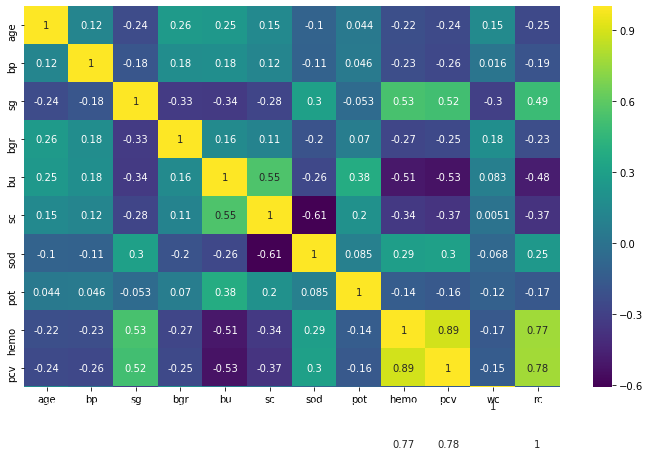

In [8]:
# heatmap of correlations between continuous variables
plt.figure(figsize=(12,7))
sns.heatmap(labeled[['age','bp','sg','bgr','bu','sc','sod','pot','hemo','pcv','wc','rc']].corr(),annot=True,cmap='viridis')
plt.ylim(10, 0)

#### (b) Propose a deep learning-based model development plan:
I choose the DNN (deep neural network) model:


--> Split the Labeled Data into a training portion and a validation portion (train : validation = 8:2)

--> Normalize the features to the min max scale for both labeled and unlabeled data

-->  check if class 0 and class 1 are imbalenced in the train and validation set

-->  Create a list of feature column objects

--> Create an object called classifier which is a DNNClassifier, set it to have 2 classes and 6 hidden layers with selected nodes respectively, and other parameters

--> Create an input function and put the train set and train classifier to the input function

--> Apply my trained model to the features in the Validation set. Compute the confusion matrix, precision, based on the predicted results and labels from the validation set 

--> Tune the hyperparameters such as nodes in each layers, number of epochs, learning rate to improve the confusion matrix, precision and other accuracy tests. Rerun the model until a relatively accurate predicted result is obtaind.

In [9]:
# reference: https://www.udemy.com/course/python-for-data-science-and-machine-learning-bootcamp/
# split the data into train and validation set
from sklearn.model_selection import train_test_split
# here the test set is actually validation set, the test_size is actually validation size
X_train, X_val, y_train, y_val = train_test_split(labeled.iloc[:,:24], labeled.iloc[:,24], test_size=0.2, random_state=42)

In [10]:
# normalize the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
unlabeled_ = scaler.transform(unlabeled)

In [11]:
X_train = pd.DataFrame(X_train,columns=labeled.columns[:-1], index = y_train.index)
X_val = pd.DataFrame(X_val,columns=labeled.columns[:-1], index = y_val.index)
unlabeled = pd.DataFrame(unlabeled_,columns=unlabeled.columns)

In [12]:
# check if the class is imbalanced
pd.value_counts(y_train)

1    147
0     93
Name: classification, dtype: int64

In [13]:
pd.value_counts(y_val)

1    38
0    22
Name: classification, dtype: int64

In [14]:
#  Create a list of feature column objects
import tensorflow as tf
age = tf.feature_column.numeric_column("age")
bp = tf.feature_column.numeric_column("bp")
sg = tf.feature_column.numeric_column("sg")
al = tf.feature_column.numeric_column("al")
su = tf.feature_column.numeric_column("su")
rbc = tf.feature_column.numeric_column("rbc")
pc = tf.feature_column.numeric_column("pc")
pcc = tf.feature_column.numeric_column("pcc")
ba = tf.feature_column.numeric_column("ba")
bgr = tf.feature_column.numeric_column("bgr")
bu = tf.feature_column.numeric_column("bu")
sc = tf.feature_column.numeric_column("sc")
sod = tf.feature_column.numeric_column("sod")
pot = tf.feature_column.numeric_column("pot")
hemo = tf.feature_column.numeric_column("hemo")
pcv = tf.feature_column.numeric_column("pcv")
wc = tf.feature_column.numeric_column("wc")
rc = tf.feature_column.numeric_column("rc")
htn = tf.feature_column.numeric_column("htn")
dm = tf.feature_column.numeric_column("dm")
cad = tf.feature_column.numeric_column("cad")
appet = tf.feature_column.numeric_column("appet")
pe = tf.feature_column.numeric_column("pe")
ane = tf.feature_column.numeric_column("ane")

In [15]:
feat_cols = [age, bp, sg, al, su, rbc, pc, pcc, ba, bgr, bu, sc, sod, pot, hemo, pcv, wc, rc, htn, dm, cad, appet, pe, ane]

In [268]:
# Create an object called classifier which is a DNNClassifier. 
# Set it to have 2 classes and 6 hidden layers with selected nodes respectively.
# input train set and train classifier to the input function
classifier = tf.estimator.DNNClassifier(hidden_units=[15,10,14,10,14,8], n_classes=2,feature_columns=feat_cols)
input_func = tf.compat.v1.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=21,num_epochs=20, shuffle=True)
classifier.train(input_fn=input_func,steps=300)

# I recorded the sets of nodes that give a more accurate result compared to the random forest classfier
# even I used the same set again and again, the result could vary a lot.
# [10,10,15,8,15,5]
# [15,10,14,10,15,8] is 89% similar to the random forest
# [15,10,14,10,14,8] is 96% similar to the random forest. This is the hidden layer set I used.

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/0r/h4pb9m7s7qg49_xhxkh7yvbc0000gn/T/tmp12jm8nlx', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in f

#### (d) Apply your trained model to the Validation set:

In [269]:
pred_fn = tf.compat.v1.estimator.inputs.pandas_input_fn(x=X_val,batch_size=len(X_val),shuffle=False)

In [270]:
note_predictions = list(classifier.predict(input_fn=pred_fn))

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/0r/h4pb9m7s7qg49_xhxkh7yvbc0000gn/T/tmp12jm8nlx/model.ckpt-229
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [271]:
note_predictions[0]

{'logits': array([0.31255314], dtype=float32),
 'logistic': array([0.57750833], dtype=float32),
 'probabilities': array([0.42249167, 0.57750833], dtype=float32),
 'class_ids': array([1]),
 'classes': array([b'1'], dtype=object),
 'all_class_ids': array([0, 1], dtype=int32),
 'all_classes': array([b'0', b'1'], dtype=object)}

In [272]:
final_preds  = []
for pred in note_predictions:
    final_preds.append(pred['class_ids'][0])

In [273]:
# Confusion Matrix, precision, recall, accuracy, and F1 score
from sklearn.metrics import classification_report,confusion_matrix
# we treat tp as class 0 measured & predicted, and tn as class 1 measured & predicted.
cm = confusion_matrix(y_val,final_preds, labels=[0, 1])
cm = pd.DataFrame(cm, index=['Class 0 Actual', 'Class 1 Actual'], columns = ['Class 0 Predicted', 'Class 1 Predicted'])
print('Confusion Matrix: \n', cm)


target_names = ['Class 0', 'Class 1']
print('Rest of the info: \n', classification_report(y_val,final_preds,target_names=target_names))

Confusion Matrix: 
                 Class 0 Predicted  Class 1 Predicted
Class 0 Actual                 21                  1
Class 1 Actual                  1                 37
Rest of the info: 
               precision    recall  f1-score   support

     Class 0       0.95      0.95      0.95        22
     Class 1       0.97      0.97      0.97        38

    accuracy                           0.97        60
   macro avg       0.96      0.96      0.96        60
weighted avg       0.97      0.97      0.97        60



In [274]:
# or we could find accuracy, precision, recall, and F1 score by following code:

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_val,final_preds)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_val,final_preds)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_val,final_preds)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_val,final_preds)
print('F1 score: %f' % f1)

Accuracy: 0.966667
Precision: 0.973684
Recall: 0.973684
F1 score: 0.973684


Apply your trained model to the 100-row Unlabeled Data:

In [281]:
pred_fn = tf.compat.v1.estimator.inputs.pandas_input_fn(x=unlabeled,batch_size=len(unlabeled),shuffle=False)
note_predictions = list(classifier.predict(input_fn=pred_fn))

y_pred  = []
for pred in note_predictions:
    y_pred.append(pred['class_ids'][0])

y_pred = pd.DataFrame(y_pred, columns = ['classification'])
y_pred

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/0r/h4pb9m7s7qg49_xhxkh7yvbc0000gn/T/tmp12jm8nlx/model.ckpt-229
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


,classification
0,0
1,1
2,0
3,1
4,0
...,...
95,0
96,1
97,1
98,1


In [282]:
y_pred.to_csv('f0040sj_dnn_prediction.csv', index=False)

For some extra exercise, I tried random forest classifier and found out the predicted result is more accurate and stable (in terms of result not changing every run).

In [283]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train,y_train)
rfc_preds = rfc.predict(X_val)
print(confusion_matrix(y_val,rfc_preds))

[[22  0]
 [ 0 38]]


In [284]:
y_pred1 = rfc.predict(unlabeled)
y_pred['y_pred1'] = y_pred1
 # compare the predicted result from DNN and random forest
y_pred


,classification,y_pred1
0,0,0
1,1,1
2,0,0
3,1,1
4,0,0
...,...,...
95,0,0
96,1,1
97,1,1
98,1,1


In [285]:
#y_pred.to_csv('mytest.csv', index=False)

In [286]:
cnt = 0
for i in range(100):
    if (y_pred.iloc[i,0] == y_pred.iloc[i,1]):
        cnt = cnt + 1

result = cnt/100
result

0.96